<a href="https://colab.research.google.com/github/41y08h/colab-notebooks/blob/main/TF_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

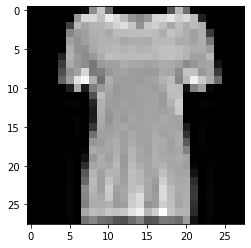

In [8]:
plt.imshow(x_train[10], cmap="gray");

In [9]:
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [10]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
K = len(np.unique(y_train))
K

10

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout

model = Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32, (3, 3), strides=2, activation="relu"),
    Conv2D(64, (3, 3), strides=2, activation="relu"),
    Conv2D(128, (3, 3), strides=2, activation="relu"),
    Flatten(),
    Dropout(0.2),
    Dense(1024, activation="relu"),
    Dropout(0.2),
    Dense(K, activation="softmax")    
])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [16]:
r = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5421 - accuracy: 0.8072 - val_loss: 0.4231 - val_accuracy: 0.8420
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3976 - accuracy: 0.8533 - val_loss: 0.3923 - val_accuracy: 0.8569
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3657 - accuracy: 0.8630 - val_loss: 0.3791 - val_accuracy: 0.8579
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3434 - accuracy: 0.8709 - val_loss: 0.3510 - val_accuracy: 0.8699
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3259 - accuracy: 0.8771 - val_loss: 0.3720 - val_accuracy: 0.8608
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3143 - accuracy: 0.8823 - val_loss: 0.3744 - val_accuracy: 0.8626
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3005 - accuracy: 0.8862 - val_loss: 0.3838 - val_accuracy:

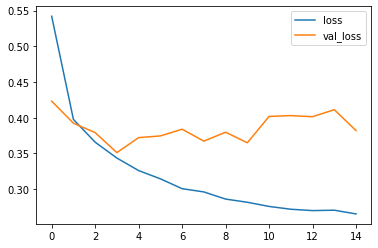

In [17]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()

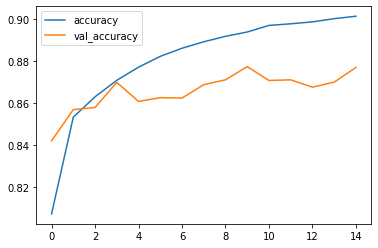

In [18]:
plt.plot(r.history['accuracy'], label="accuracy")
plt.plot(r.history['val_accuracy'], label="val_accuracy")

plt.legend();

In [19]:
y_pred = model.predict(x_test)
y_true = y_test

313/313 [==============================] - 1s 2ms/step


In [20]:
# Convert one hot to sparse
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

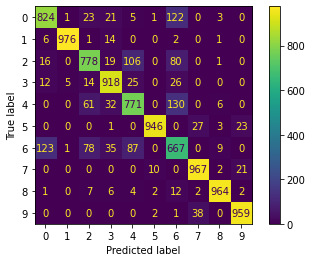

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true, y_pred);